<a href="https://colab.research.google.com/github/Diego-CB/Lista_1/blob/main/Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio No.1
- Diego Cordova 20212
- Paola de León 20361
- Gabriela Contreras 20213

### EJERCICIO NO.1

**OpenCV**
- *Lectura de imagenes*
```
<!-- args: image file -->
image = cv2.imread("image_path.jpg")
```

- *Convertir img a array*
  - Abrir la imagen con cv2.imred retorna la imagen en un array de Numpy, cada valor del array corresponde a un pixel de la imagen.

- *Convertir de array a img*
```
bgr_img = cv2.cvtColor(array_imagen, cv2.COLOR_BGR2RGB)
```

- *Guardar imagenes a disco duro*
```
 <!-- args: img , file path  -->
 cv2.imwrite(file_path, img)
```

- *Almacenamiento de imagenes en memoria*
  -  las imágenes son matrices NumPy multidimensionales



**PIL**
- *Lectura de imagenes*
```
<!-- args: image path -->
image = Image.open("image.jpg")
```

- *Convertir img a array*
```
<!-- args: image file -->
numpy_array = np.array(img)
```

- *Convertir de array a img*
```
<!-- args: numpy_array -->
m = Image.fromarray(array)
```

- Almacenamiento de imagenes en memoria
  - las imagenes se pueden convertir a un Numpy array decuardo a las necesides del usuario

- *Guardar imagenes a disco duro*
```
<!-- args: Nombre y formato de salida -->
 new_image.save("image_1.jpg")
```






**Matplotlib**
- *Guardar imagenes a disco duro*
```
<!-- args: Nombre y formato de salida -->
plt.savefig("output.jpg")
```



## Ejercicio No. 2
Tomar dos fotos de una misma escena pero con diferentes iluminaciones. Leer las imágenes correspondientes en Python y
hacer lo siguiente:
1. Construir en ambos casos los histogramas normalizados R,G,B (puede usar los 256 bines, u otra cantidad, por ejemplo 16 bines por cada canal de color).

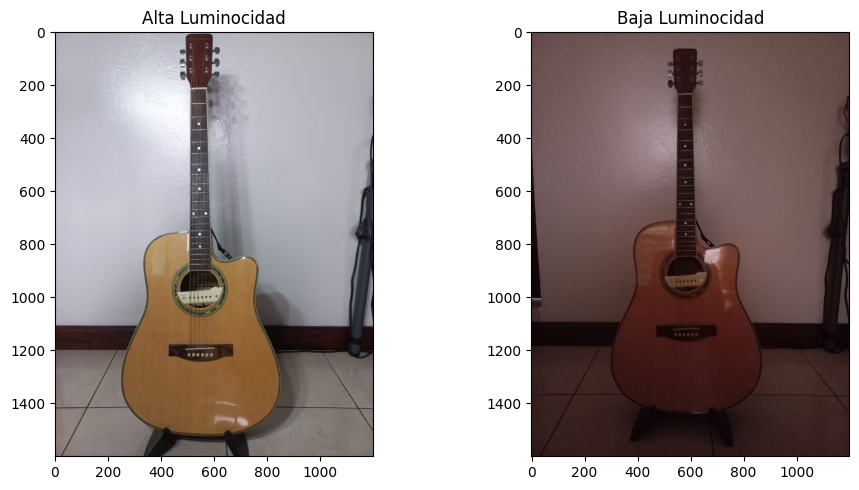

In [55]:
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de las dos imágenes
imagen1_path = './high_light.jpg'
imagen2_path = './Low_Light.jpg'

# Abrir las imágenes con Pillow
imagen1 = Image.open(imagen1_path)
imagen2 = Image.open(imagen2_path)

# Mostrar las imágenes en pantalla
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(imagen1)
axs[0].set_title('Alta Luminocidad')

axs[1].imshow(imagen2)
axs[1].set_title('Baja Luminocidad')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


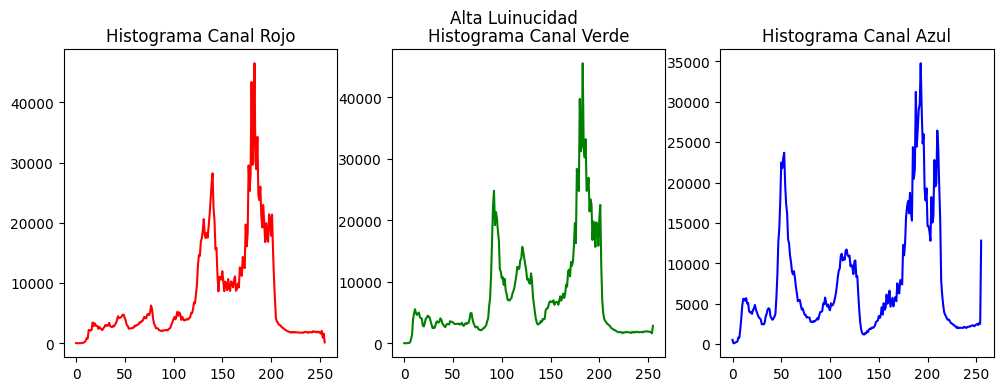

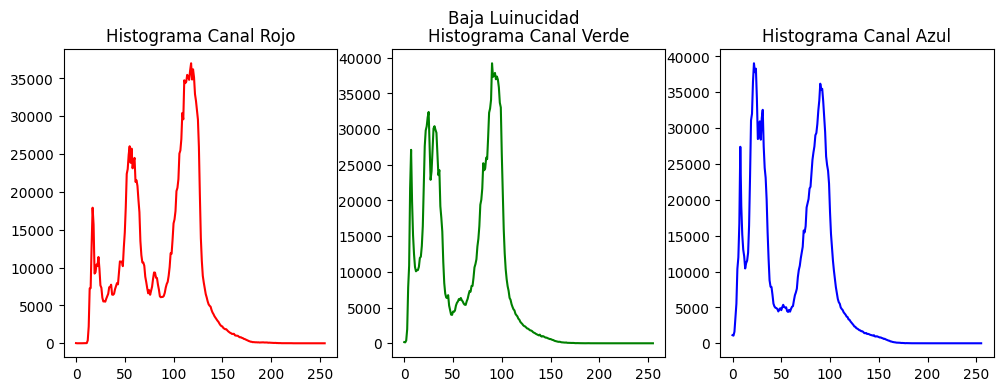

In [56]:
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import numpy as np

def create_rgb_histogram(imagen_path, title='Histograma'):
    imagen = io.imread(imagen_path)

    # Obtener los canales de color
    red_channel = imagen[:,:,0]
    green_channel = imagen[:,:,1]
    blue_channel = imagen[:,:,2]

    # Calcular los histogramas de cada canal de color
    hist_red, bin_centers_red =     np.histogram(red_channel, bins=256, range=[0, 255])
    hist_green, bin_centers_green = np.histogram(green_channel, bins=256, range=[0, 255])
    hist_blue, bin_centers_blue =   np.histogram(blue_channel, bins=256, range=[0, 255])

    # Mostrar los histogramas de colores
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(hist_red, color='red')
    plt.title('Histograma Canal Rojo')

    plt.subplot(1, 3, 2)
    plt.plot(hist_green, color='green')
    plt.title('Histograma Canal Verde')

    plt.subplot(1, 3, 3)
    plt.plot(hist_blue, color='blue')
    plt.title('Histograma Canal Azul')

    plt.suptitle(title)
    plt.show()

    return hist_red, hist_green, hist_blue

hr, hg, hb = create_rgb_histogram('./high_light.jpg', 'Alta Luinucidad')
lr, lg, lb = create_rgb_histogram('./Low_Light.jpg', 'Baja Luinucidad')


2. Proponer una distancia que permita comparar dos histogramas.

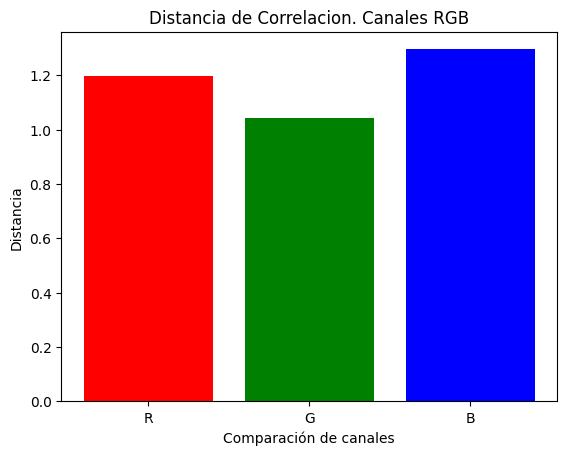

In [57]:
import numpy as np

def correlation_distance(hist1, hist2):
    covariance_matrix = np.cov(hist1, hist2)
    correlation_coefficient = \
        covariance_matrix[0, 1] / np.sqrt(covariance_matrix[0, 0] * covariance_matrix[1, 1] + 1e-10)
    distance = 1 - correlation_coefficient
    return distance

def plot_correlacion(first, second, title, colors=['R', 'G', 'B']):
    distancia_R = correlation_distance(first[0], second[0])
    distancia_G = correlation_distance(first[1], second[1])
    distancia_B = correlation_distance(first[2], second[2])

    distancias = [distancia_R, distancia_G, distancia_B]

    # Crear la gráfica de barras
    plt.bar(colors, distancias, color=['red', 'green', 'blue'])

    # Añadir etiquetas y título
    plt.xlabel('Comparación de canales')
    plt.ylabel('Distancia')
    plt.title(title)

    # Mostrar la gráfica
    plt.show()

plot_correlacion([hr, hg, hb], [lr, lg, lb], 'Distancia de Correlacion. Canales RGB')


3. Comparar las distancias obtenidas entre las dos fotos tomadas, y otras fotos de su elección, no relacionadas con sus fotos. Evaluar por ejemplo la distribución de las distancias obtenidas.

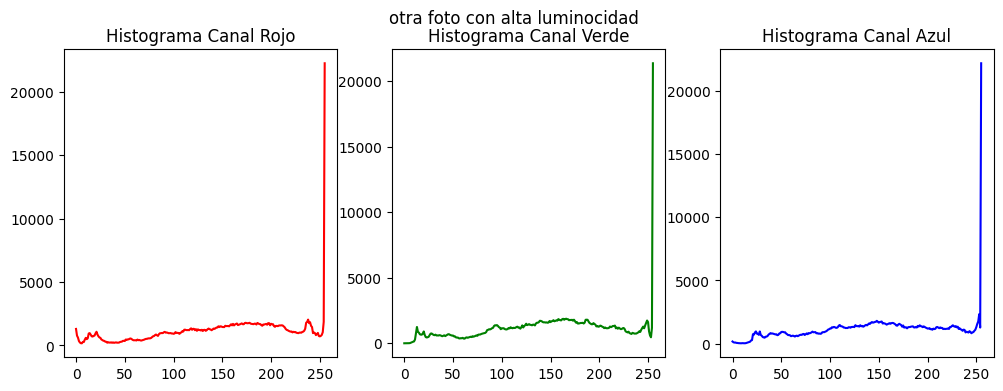

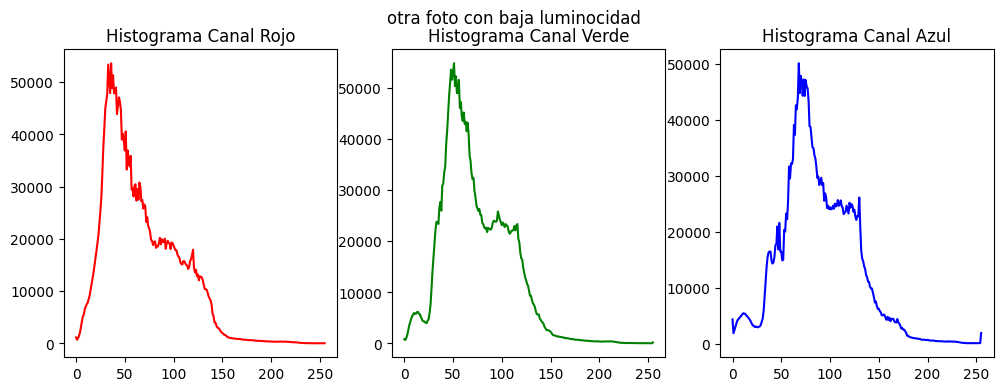

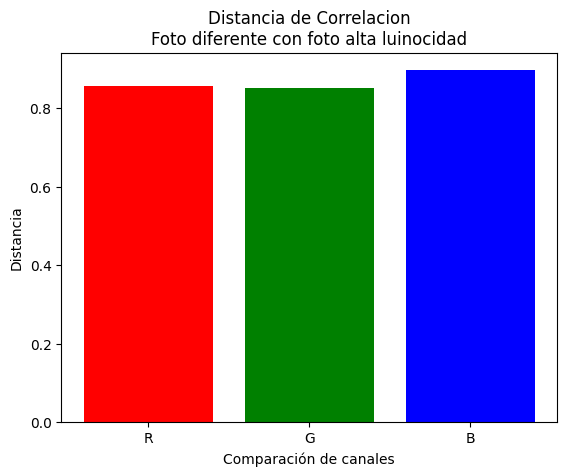

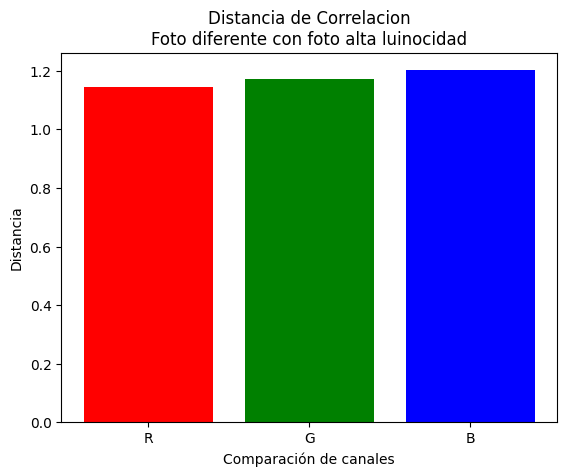

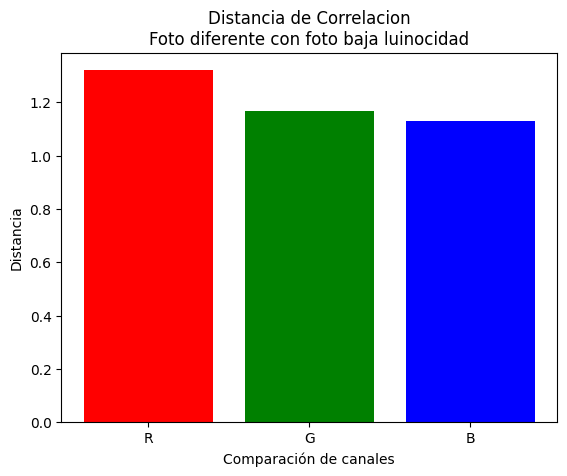

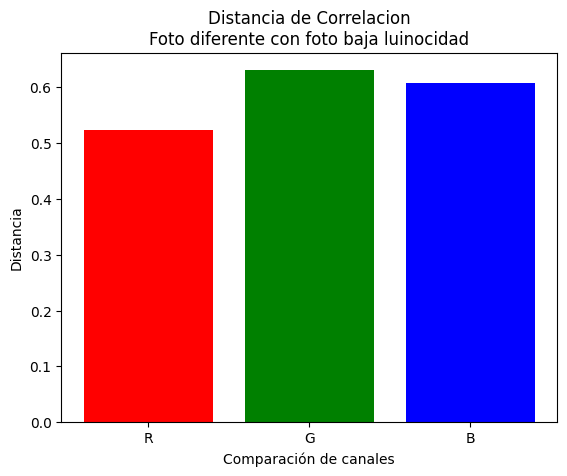

In [58]:
fr, fg, fb = create_rgb_histogram('./foto.jpg', 'otra foto con alta luminocidad')
f2r, f2g, f2b = create_rgb_histogram('./foto2.jpg', 'otra foto con baja luminocidad')

plot_correlacion([hr, hg, hb], [fr, fg, fb], 'Distancia de Correlacion\nFoto diferente con foto alta luinocidad')
plot_correlacion([lr, lg, lb], [fr, fg, fb], 'Distancia de Correlacion\nFoto diferente con foto alta luinocidad')

plot_correlacion([hr, hg, hb], [f2r, f2g, f2b], 'Distancia de Correlacion\nFoto diferente con foto baja luinocidad')
plot_correlacion([lr, lg, lb], [f2r, f2g, f2b], 'Distancia de Correlacion\nFoto diferente con foto baja luinocidad')


Como se puede observar, las distancias obtenidas comparando los histogramas de la foto de la misma escen con alta y baja luminocidad son mayores a las distancias obtenidas al compararlo con otra foto con baja luminocidad. Además la distancia es más baja al comparar la foto inicial con alta luminocidad con la foto de comparación con bajo luminocidad.

Por otro lado, al comparar las fotos iniciales con otra con baja luminocidad se puede obervar que las distancias mínimas se alcanzan al comparar la foto inicial con bajo luminocidad con la foto de comparación de baja luminocidad.

4. Ahora, convertir cada imagen RGB a HSV.

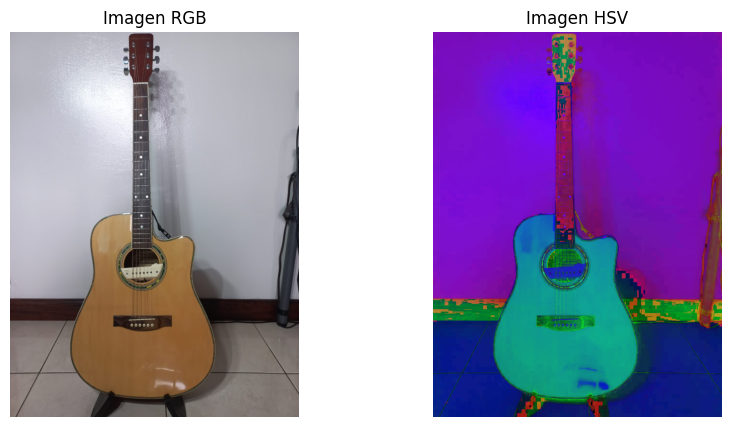

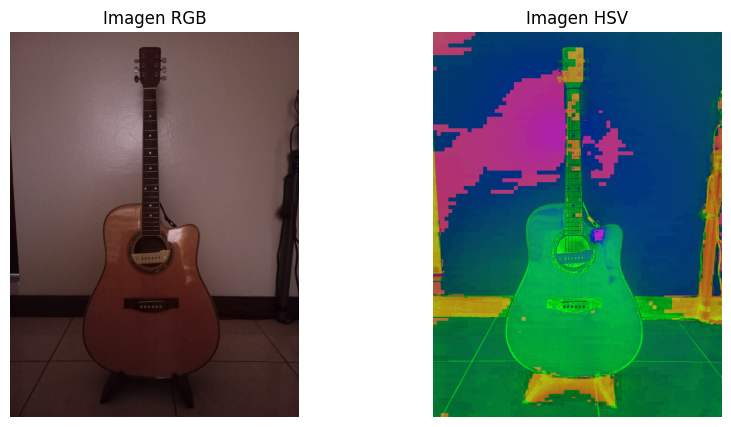

In [59]:
import cv2
import matplotlib.pyplot as plt

def rgb_to_hsv(image):
    # Convertir la imagen de RGB a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image


def show_rgb_hsv(path):
    
  # Abrir la imagen con OpenCV
  imagen_rgb = cv2.imread(path)
  imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

  # Convertir a HSV
  hsv_image = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

  # Mostrar las imágenes original y en formato HSV
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(imagen_rgb)
  plt.title('Imagen RGB')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(hsv_image)
  plt.title('Imagen HSV')
  plt.axis('off')

  plt.show()

show_rgb_hsv('./high_light.jpg')
show_rgb_hsv('./Low_Light.jpg')

5. Construir esta vez histogramas en H,S (en 2D) y repetir el paso 3.

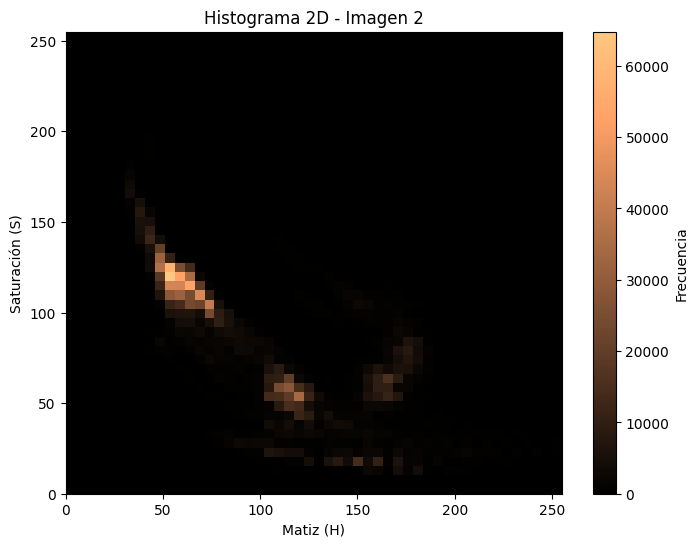

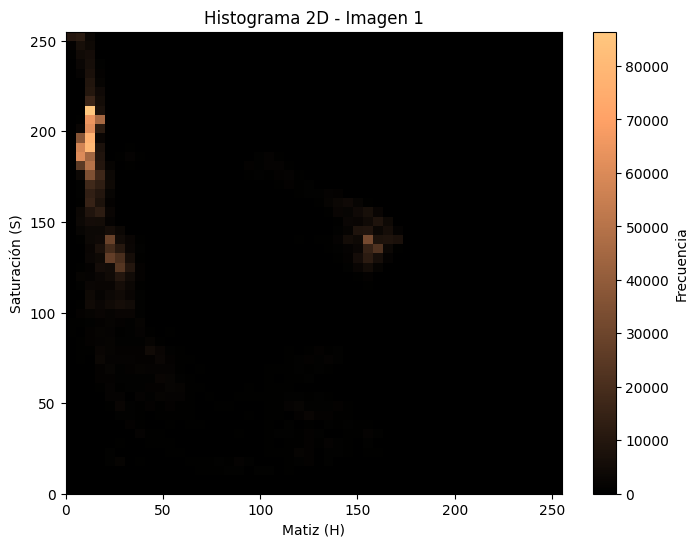

In [60]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot_hsv_histogram_2d(image, title, bins):
    # Convertir la imagen a formato HSV
    hsv_image = image.convert('HSV')

    # Obtener los canales H y S
    h_channel = np.array(hsv_image)[:,:,1]
    s_channel = np.array(hsv_image)[:,:,2]

    # Crear histograma 2D para H y S con escala fija en el colorbar
    plt.figure(figsize=(8, 6))
    plt.hist2d(
        h_channel.ravel(),
        s_channel.ravel(),
        bins=(bins, bins),
        cmap='copper',
        range=[[0, 255], [0, 255]]
    )
    plt.colorbar(label='Frecuencia')
    plt.title(title)
    plt.xlabel('Matiz (H)')
    plt.ylabel('Saturación (S)')
    plt.show()

# Abrir las imágenes con Pillow
imagen1 = Image.open('./high_light.jpg')
imagen2 = Image.open('./Low_Light.jpg')

# Mostrar histogramas 2D para los canales H y S de ambas imágenes con escala fija en el colorbar
plot_hsv_histogram_2d(imagen2, 'Histograma 2D - Imagen 2', 50)
plot_hsv_histogram_2d(imagen1, 'Histograma 2D - Imagen 1', 50)


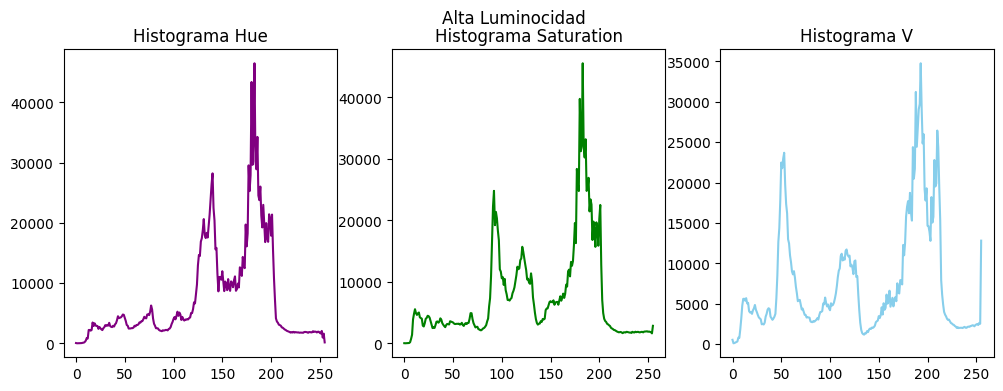

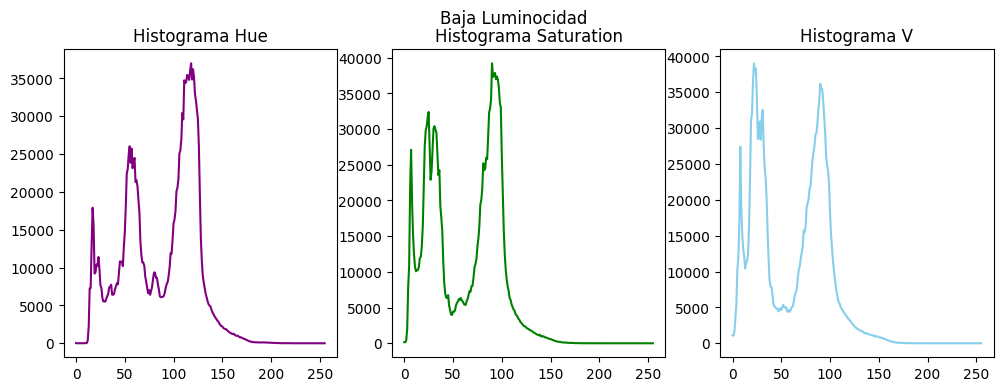

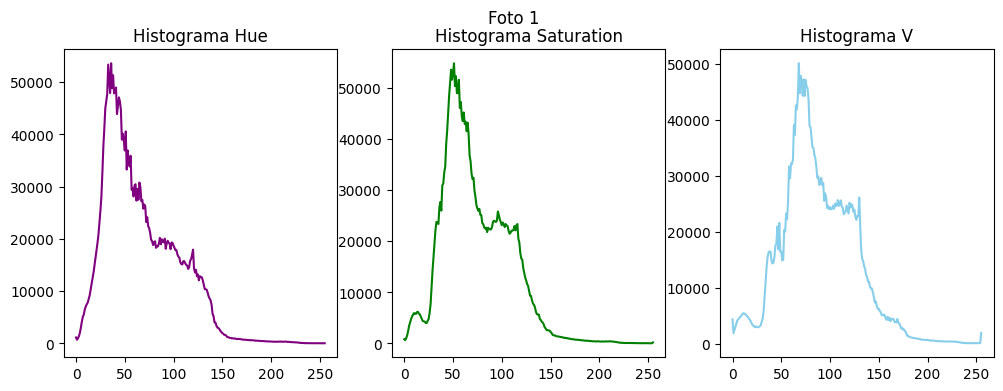

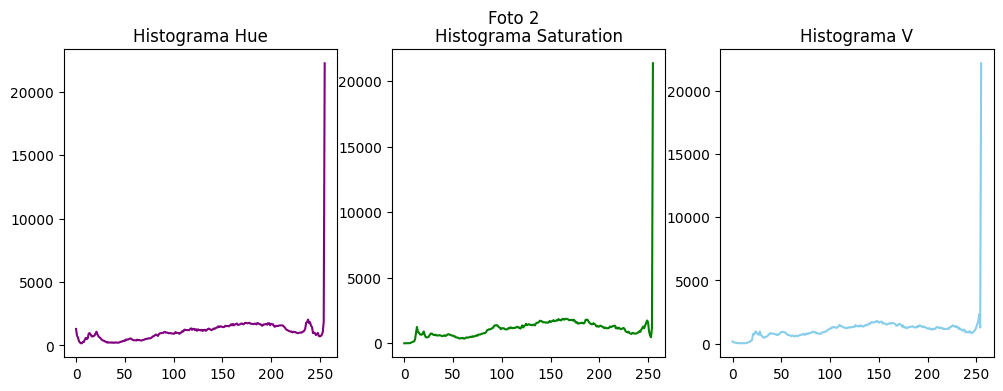

In [61]:
def create_hsv_histogram(imagen_path, title='Histograma'):
    imagen = io.imread(imagen_path)

    # Obtener los canales de color
    red_channel = imagen[:,:,0]
    green_channel = imagen[:,:,1]
    blue_channel = imagen[:,:,2]

    # Calcular los histogramas de cada canal de color
    hist_h, _ =     np.histogram(red_channel, bins=256, range=[0, 255])
    hist_s, _ = np.histogram(green_channel, bins=256, range=[0, 255])
    hist_v, _ =   np.histogram(blue_channel, bins=256, range=[0, 255])

    # Mostrar los histogramas de colores
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(hist_h, color='purple')
    plt.title('Histograma Hue')

    plt.subplot(1, 3, 2)
    plt.plot(hist_s, color='green')
    plt.title('Histograma Saturation')

    plt.subplot(1, 3, 3)
    plt.plot(hist_v, color='skyblue')
    plt.title('Histograma V')

    plt.suptitle(title)
    plt.show()

    return hist_h, hist_s, hist_v

hh, hs, hv = create_hsv_histogram('./high_light.jpg', 'Alta Luminocidad')
lh, ls, lv = create_hsv_histogram('./Low_Light.jpg', 'Baja Luminocidad')

f1h, f1s, f1v = create_hsv_histogram('./foto2.jpg', 'Foto 1')
f2h, f2s, f2v = create_hsv_histogram('./foto.jpg', 'Foto 2')

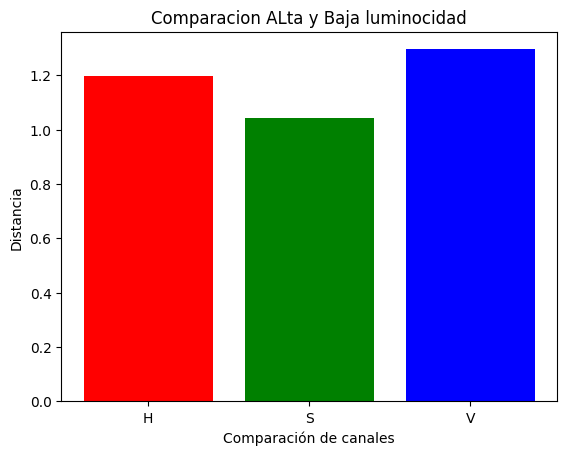

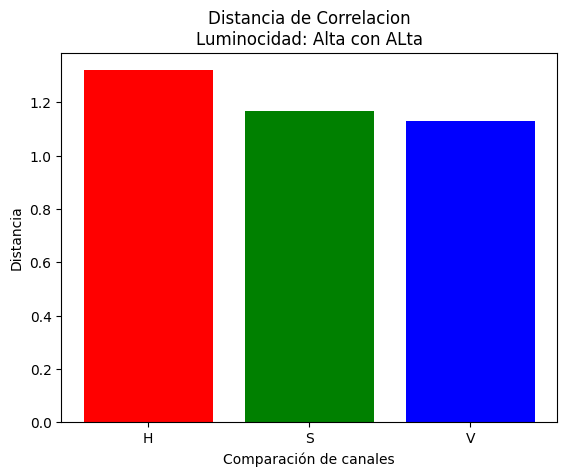

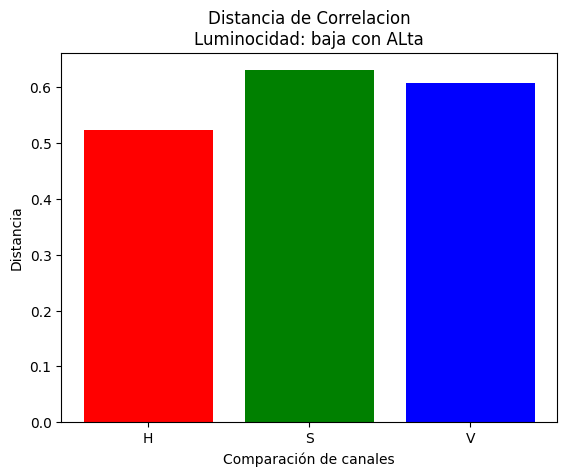

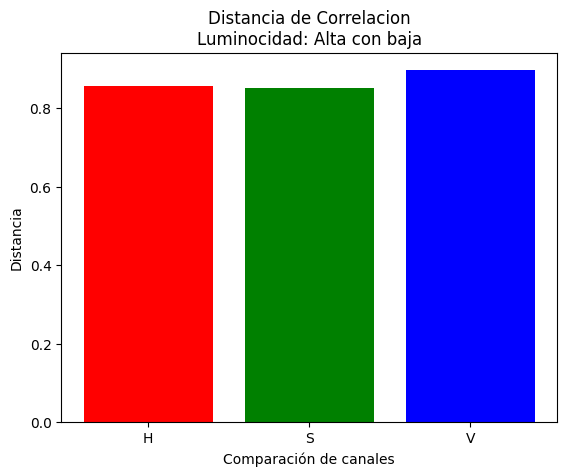

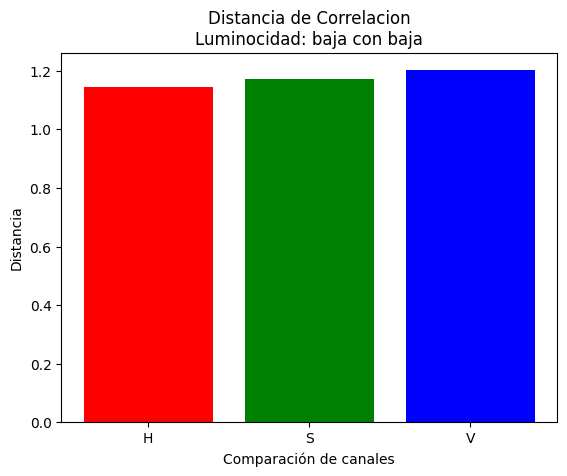

In [75]:
plot_correlacion([hh, hs, hv], [lh, ls, lv], 'Comparacion ALta y Baja luminocidad', ['H', 'S', 'V'])

plot_correlacion([hh, hs, hv], [f1h, f1s, f1v], 'Distancia de Correlacion\nLuminocidad: Alta con ALta', ['H', 'S', 'V'])
plot_correlacion([lh, ls, lv], [f1h, f1s, f1v], 'Distancia de Correlacion\nLuminocidad: baja con ALta', ['H', 'S', 'V'])

plot_correlacion([hh, hs, hv], [f2h, f2s, f2v], 'Distancia de Correlacion\nLuminocidad: Alta con baja', ['H', 'S', 'V'])
plot_correlacion([lh, ls, lv], [f2h, f2s, f2v], 'Distancia de Correlacion\nLuminocidad: baja con baja', ['H', 'S', 'V'])

Los resultados en este caso son bastante similares a las comparaciones hechas con los canales RGB. De hecho se ven casi idénticos.

Lo que cambia en este caso es la información visual que se logra visualizar al renderizar la imágen. Más específicamente las zonas con poca luz se logran distinguir mejor en la imágen HSV.

## Ejercicio No. 3

In [63]:
! pip install opencv-python
! pip install numpy
! pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lectura de la imagen
img = cv2.imread("img.jpg")
img_G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertir img a escala de grises

In [65]:
def HistNorm(img_G, title):
    hist,bins = np.histogram(img_G.flatten(),256,[0,256])
    plt.subplot(1, 2, 1)
    plt.hist(img_G.ravel(),256,[0,256], color= "steelblue")
    plt.title(title)
    plt.xlim([0,256])

    return hist

def DistAcum(hist, title):
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.subplot(1, 2, 2)
    plt.plot(cdf_normalized, color= "darkorange")
    plt.xlim([0,256]) # se utiliza para establecer un limite eje x 
    plt.title(title)

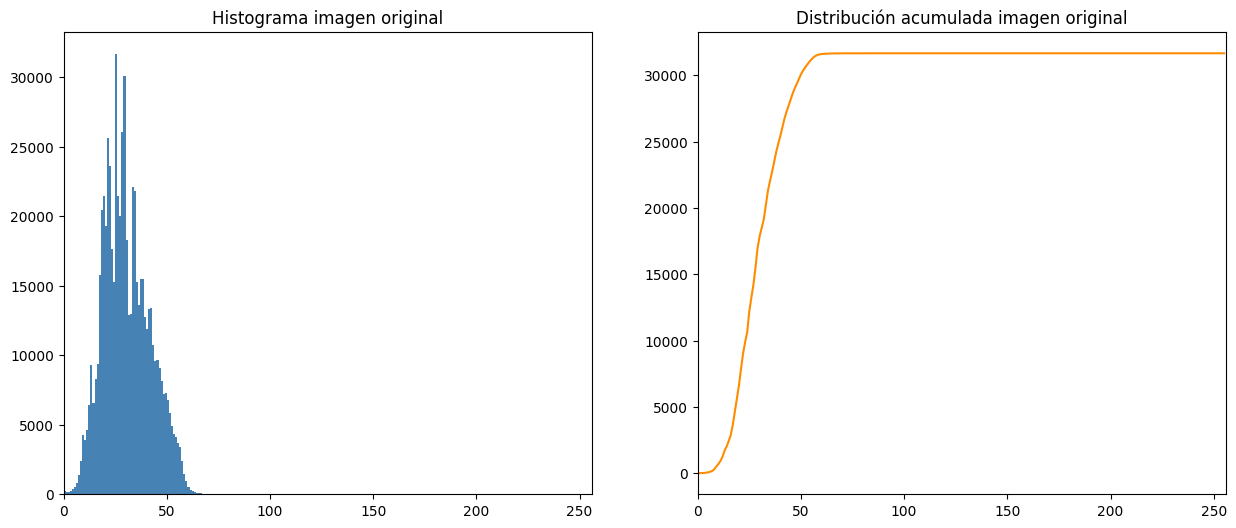

In [66]:
# Hitogramas de imagen original
plt.figure(figsize=(15, 6))
hist = HistNorm(img_G, "Histograma imagen original")
acum = DistAcum(hist, "Distribución acumulada imagen original")
plt.show()

In [67]:
# Equalización manual
cdf = []
contador = 0
histograma = [0] * 256  #Crear histograma con 256 elementos con el valor 0 

# Conteo de la frecuencia de cada pixel
for linea in img_G:
    for pixel in linea:
        histograma[pixel] += 1

# Distribución acumulada 
for elemento in histograma:
    contador += elemento
    cdf.append(contador)

cdf_minVal = min(cdf)

# Transformación de Equalización

cdf_Norm = [(x - cdf_minVal) * 255 / (cdf[-1] - cdf_minVal) for x in cdf]
equalizacion = [[cdf_Norm[i] for i in row] for row in img_G]
img_equalizada = np.array(equalizacion, dtype=np.uint8)

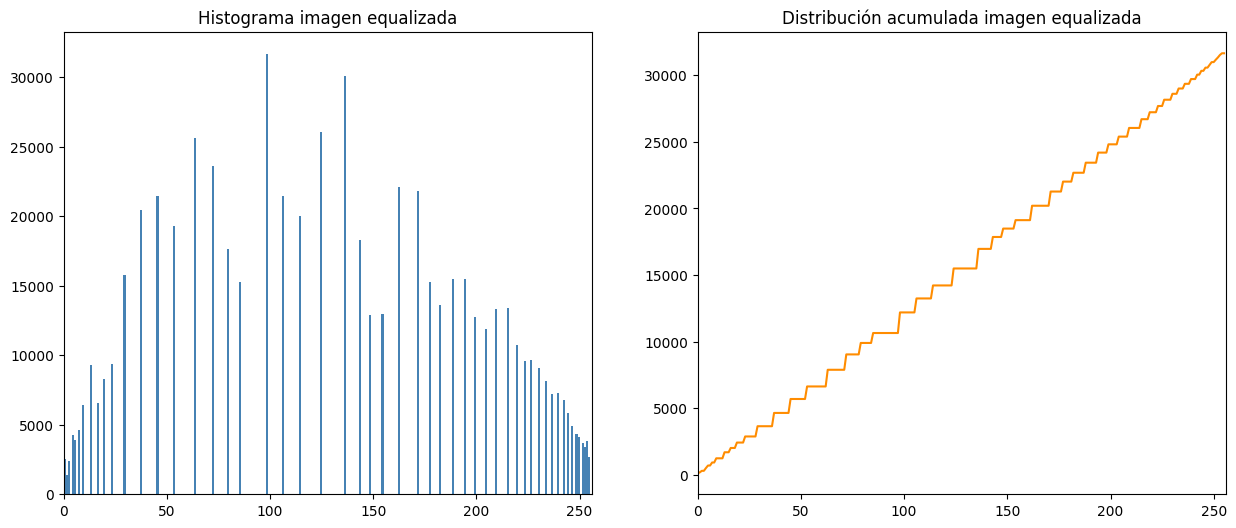

In [68]:
plt.figure(figsize=(15, 6))
hist = HistNorm(img_equalizada, "Histograma imagen equalizada")
acum = DistAcum(hist, "Distribución acumulada imagen equalizada")
plt.show()

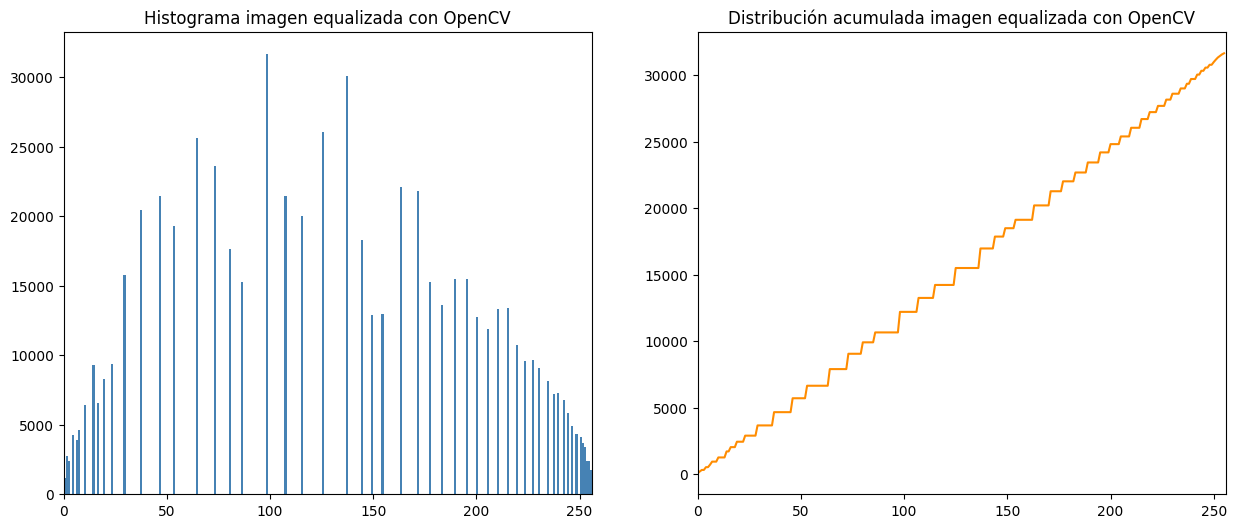

In [69]:
# Hitogramas de imagen con openCV
equalizeImg_cv2 = cv2.equalizeHist(img_G)

plt.figure(figsize=(15, 6))
hist = HistNorm(equalizeImg_cv2, "Histograma imagen equalizada con OpenCV")
acum = DistAcum(hist, "Distribución acumulada imagen equalizada con OpenCV")
plt.show()


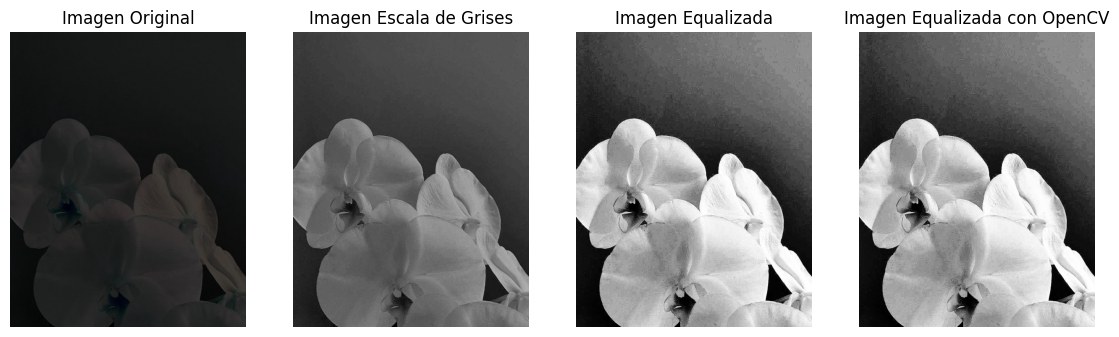

In [70]:
fig, axs = plt.subplots(1, 4, figsize=(14, 6))

axs[0].axis('off')
axs[0].set_title('Imagen Original')
axs[0].imshow(img)

axs[1].axis('off')
axs[ 1].set_title('Imagen Escala de Grises')
axs[1].imshow(img_G, cmap='gray')

axs[2].axis('off')
axs[2].set_title('Imagen Equalizada')
axs[2].imshow(equalizeImg_cv2, cmap='gray')

axs[3].axis('off')
axs[3].set_title('Imagen Equalizada con OpenCV')
axs[3].imshow(equalizeImg_cv2, cmap='gray')


¿Son iguales sus resultados con los de la función?
- En escencia la imagen equalizada de forma manual es muy similar a la de la funcion, no obstante en el fondo de la imagen que hace uso de la funcion  se puede ver como es que los tonos gris obscuro son más fuertes que en la imagen que no; esto tambien se pude ver reflejado en histograma pues al inico las barras se encuentran unidas en la imagen de la funcion y en la que no hace uso de esta las barras se encuentran más dispersas entre los numeros  0 y 50 

## Ejercicio No. 4

## Ejercicio No. 5

## Ejercicio No. 6

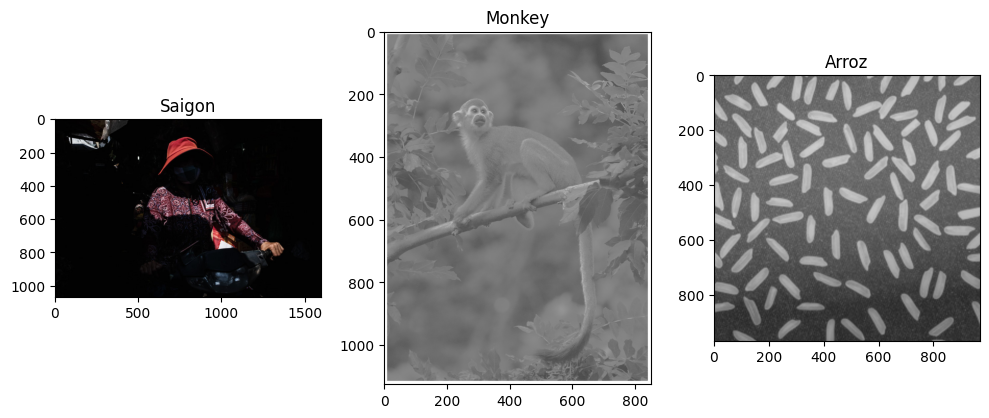

In [71]:
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de las dos imágenes
imagen1_path = './saigon.jpeg'
imagen2_path = './monkey.jpeg'
imagen3_path = './arroz.png'

# Abrir las imágenes con Pillow
imagen1 = Image.open(imagen1_path)
imagen2 = Image.open(imagen2_path)
imagen3 = Image.open(imagen3_path)

# Mostrar las imágenes en pantalla
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(imagen1)
axs[0].set_title('Saigon')

axs[1].imshow(imagen2)
axs[1].set_title('Monkey')

axs[2].imshow(imagen3)
axs[2].set_title('Arroz')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


1. Saigon.jpeg

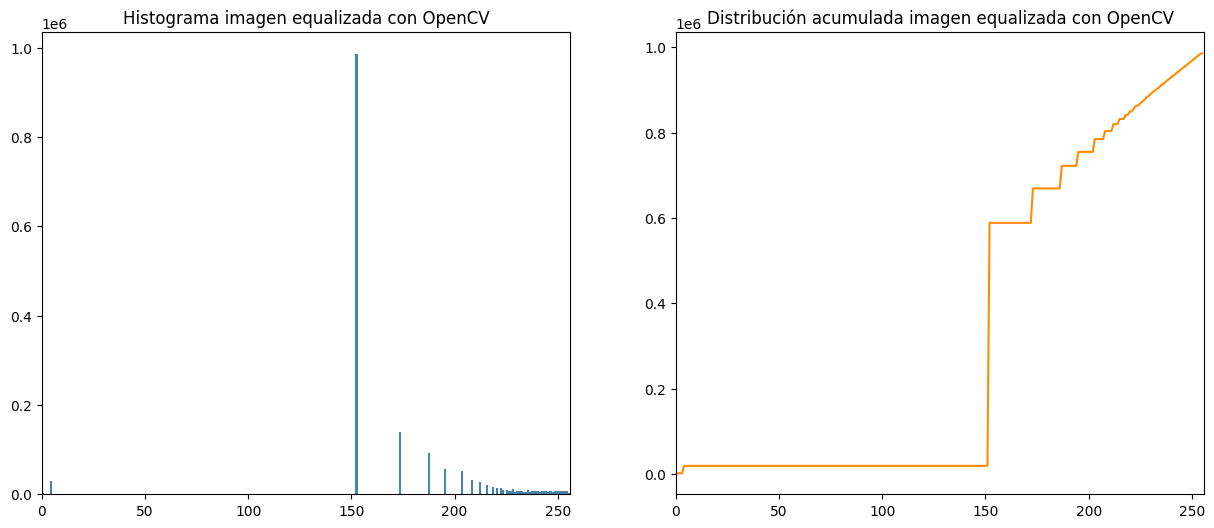

In [72]:

# Lectura de la imagen
img = cv2.imread("./saigon.jpeg")
img_G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertir img a escala de grises

# Hitogramas de imagen con openCV
equalizeImg_cv2 = cv2.equalizeHist(img_G)

plt.figure(figsize=(15, 6))
hist = HistNorm(equalizeImg_cv2, "Histograma imagen equalizada con OpenCV")
acum = DistAcum(hist, "Distribución acumulada imagen equalizada con OpenCV")
plt.show()

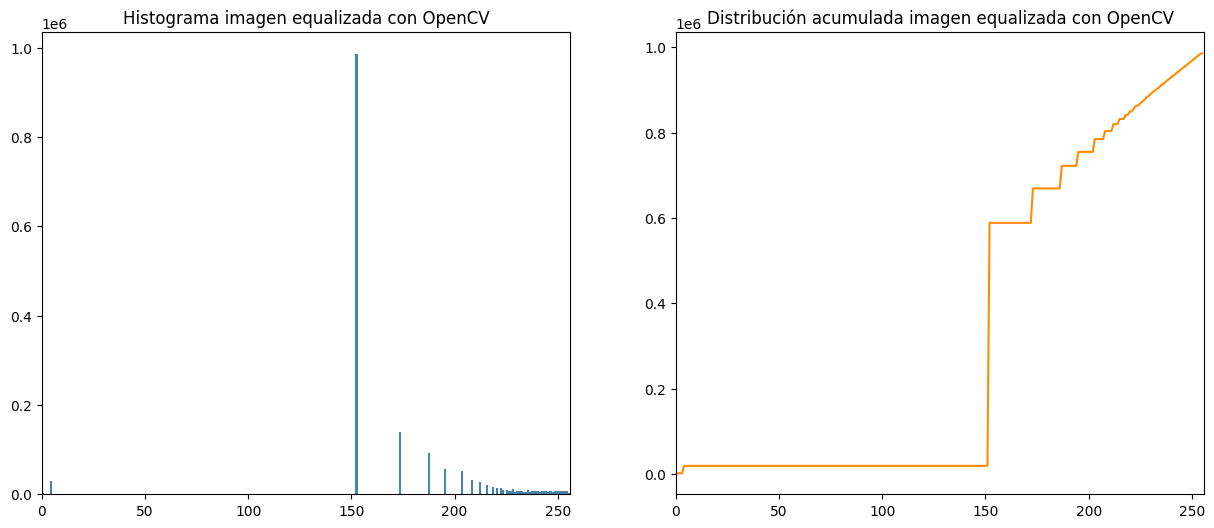

In [73]:

# Lectura de la imagen
img = cv2.imread("./saigon.jpeg")
img_G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertir img a escala de grises

# Hitogramas de imagen con openCV
equalizeImg_cv2 = cv2.equalizeHist(img_G)

plt.figure(figsize=(15, 6))
hist = HistNorm(equalizeImg_cv2, "Histograma imagen equalizada con OpenCV")
acum = DistAcum(hist, "Distribución acumulada imagen equalizada con OpenCV")
plt.show()

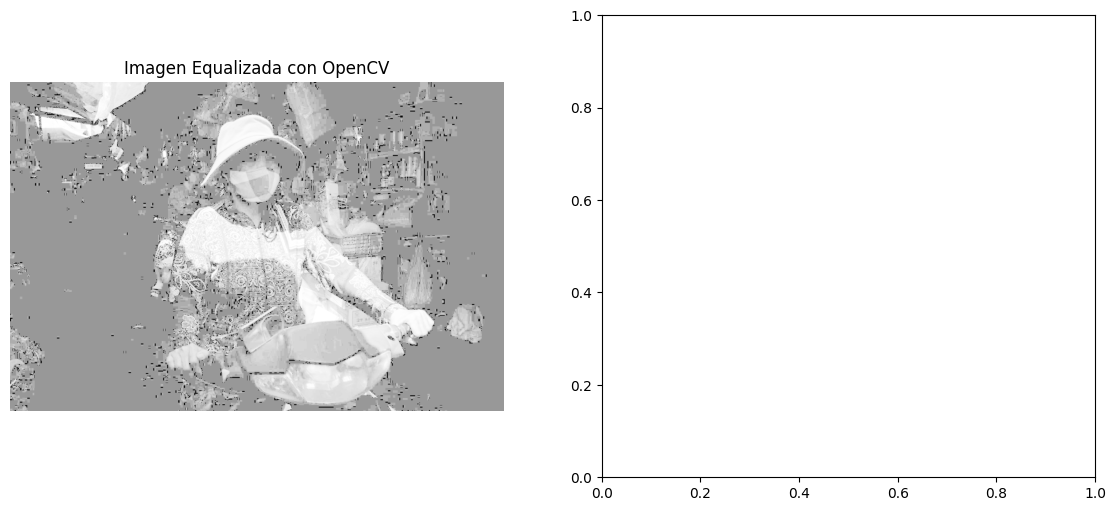

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].axis('off')
axs[0].set_title('Imagen Equalizada con OpenCV')
axs[0].imshow(equalizeImg_cv2, cmap='gray')
